# Fake Tweets Predict Modle Neural Network

AI research assignment

Master Data-driven design
Fundamentals of Machine Learning course
In collaboration with the Research Group Artificial Intelligence
University of Applied Science Utrecht
January, 2021

Distinguishining fake news tweets from real news tweets by Neural Network is the final goal!

Twitter data to identify derivative and remarkable features that affect the accuracy of machine learning methods for detecting fake tweets using data mining.

In order to prepar the environmet to do this project first I Setup a Python Environment for Machine Learning and Deep Learning using pip install --- in Anaconda prompt then import all needed functions.

In [29]:
import pandas as pd
import numpy as np
import tensorflow as tf
import re
import random
import tensorflow_hub as hub
import bert
import seaborn as sns
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import string
import nltk
nltk.download('wordnet')
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.util import ngrams
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
nltk.download('punkt')
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from nltk.corpus import wordnet as wn
from nltk import pos_tag
from sklearn.preprocessing import LabelEncoder
from collections import defaultdict
from nltk.corpus import wordnet as wn
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import model_selection, naive_bayes
from sklearn.metrics import accuracy_score

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Hoda\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Hoda\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Hoda\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [30]:
#reading data file
track_reviews = pd.read_csv("Dataset.csv")

In [31]:
track_reviews = track_reviews[["text","label"]]

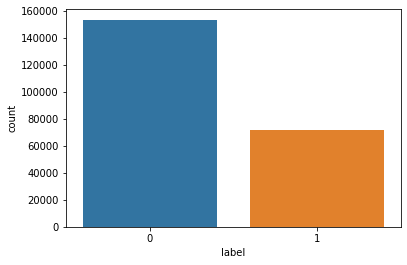

In [32]:
#To show value counts for lable variable
sns.countplot(x='label',data=track_reviews)

To distingush the data befor cleaning I am going to show frequent Words in all tweets and real tweets and fake tweets by using wordcloud.

(-0.5, 399.5, 199.5, -0.5)

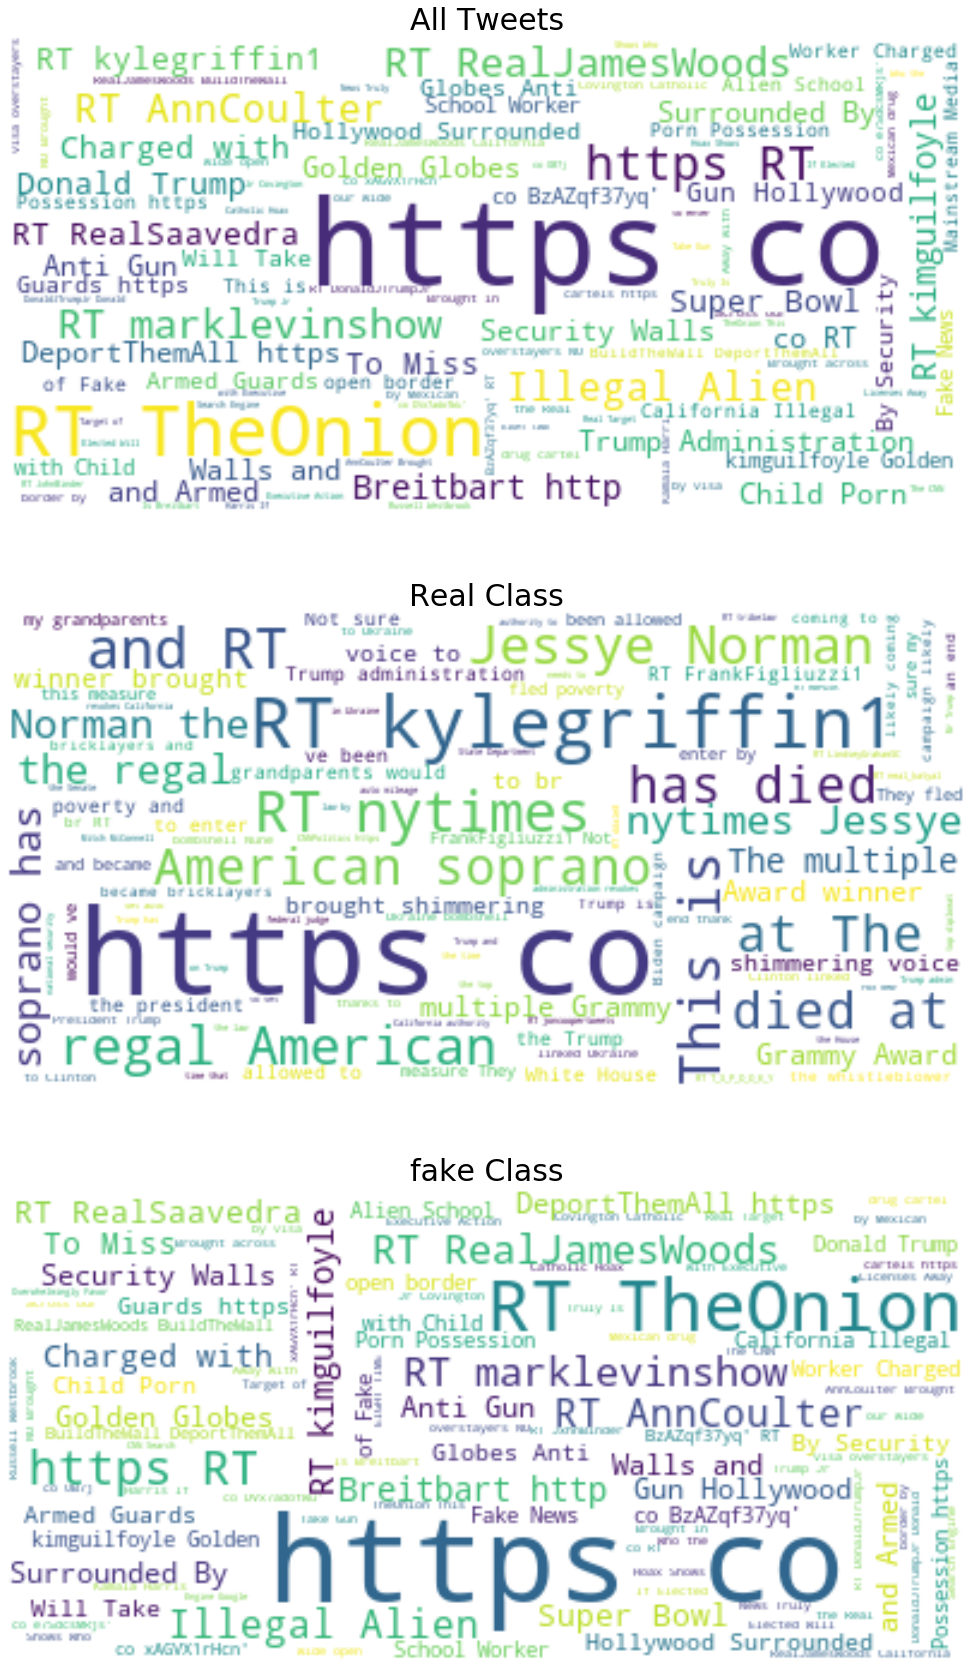

In [33]:
#Show wordcloud
#!pip install wordcloud
from wordcloud import WordCloud, STOPWORDS , ImageColorGenerator

df_real = track_reviews[track_reviews['label']==1]
df_fake = track_reviews[track_reviews['label']==0]

tweet_All = " ".join(review for review in track_reviews.text)
tweet_real = " ".join(review for review in df_real.text)
tweet_fake = " ".join(review for review in df_fake.text)

fig, ax = plt.subplots(3, 1, figsize  = (30,30))
wordcloud_ALL = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(tweet_All)
wordcloud_real = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(tweet_real)
wordcloud_fake = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(tweet_fake)

ax[0].imshow(wordcloud_ALL, interpolation='bilinear')
ax[0].set_title('All Tweets', fontsize=30)
ax[0].axis('off')
ax[1].imshow(wordcloud_real, interpolation='bilinear')
ax[1].set_title('Real Class',fontsize=30)
ax[1].axis('off')
ax[2].imshow(wordcloud_fake, interpolation='bilinear')
ax[2].set_title('fake Class',fontsize=30)
ax[2].axis('off')

#wordcloud.to_file("img/first_review.png")

# Cleaning

As we know cleaning data constitute 80% of the job! 
includ different ways and stops, which means splitting it into words and handling punctuation and case.
In fact, there is a whole suite of text preparation methods that you may need to use, and the choice of methods really depends on your natural language processing task.
remoing RT @ \ ... in tweets is the first, then panctuation which is important to have tweets without commas and quotes and final step remove tags.
and then show in wordclod agin with clean data to compare.

In [34]:
#remove RT
track_reviews['text']=track_reviews['text'].apply(lambda x: re.compile('\#').sub('', re.compile('RT @').sub('@', x, count=1).strip()))
track_reviews.head()

text  label
0  '@SenJeffMerkley: The Endangered Species Act s...      1
1  '@LindseyGrahamSC: Interesting concept -- impe...      1
2  '@RealJamesWoods: BuildTheWall DeportThemAll  ...      0
3  '@PatriotJackiB: Why would the MEXICAN GOV’T f...      0
4  '@TheOnion: Sweden Announces Plan To Get 100% ...      0

In [35]:
#Remov _punctuation
def remove_punctuation(text):
    no_punct=[words for words in text if words not in string.punctuation]
    words_wo_punct=''.join(no_punct)
    return words_wo_punct
track_reviews['text']=track_reviews['text'].apply(lambda x: remove_punctuation(x))
track_reviews.head()

text  label
0  SenJeffMerkley The Endangered Species Act save...      1
1  LindseyGrahamSC Interesting concept  impeach f...      1
2  RealJamesWoods BuildTheWall DeportThemAll  htt...      0
3  PatriotJackiB Why would the MEXICAN GOV’T fund...      0
4  TheOnion Sweden Announces Plan To Get 100 Of E...      0

In [36]:
def preprocess_text(sen):
    # Removing html tags
    sentence = remove_tags(sen)

    # Remove punctuations and numbers
    sentence = re.sub('[^a-zA-Z]', ' ', sentence)

    # Single character removal
    sentence = re.sub(r"\s+[a-zA-Z]\s+", ' ', sentence)

    # Removing multiple spaces
    sentence = re.sub(r'\s+', ' ', sentence)
    
    # Remove unicode characters
    sentence = sentence.encode('ascii', 'ignore').decode()

    return sentence.lower()

In [37]:
TAG_RE = re.compile(r'<[^>]+>')

def remove_tags(text):
    return TAG_RE.sub('', text)

(-0.5, 399.5, 199.5, -0.5)

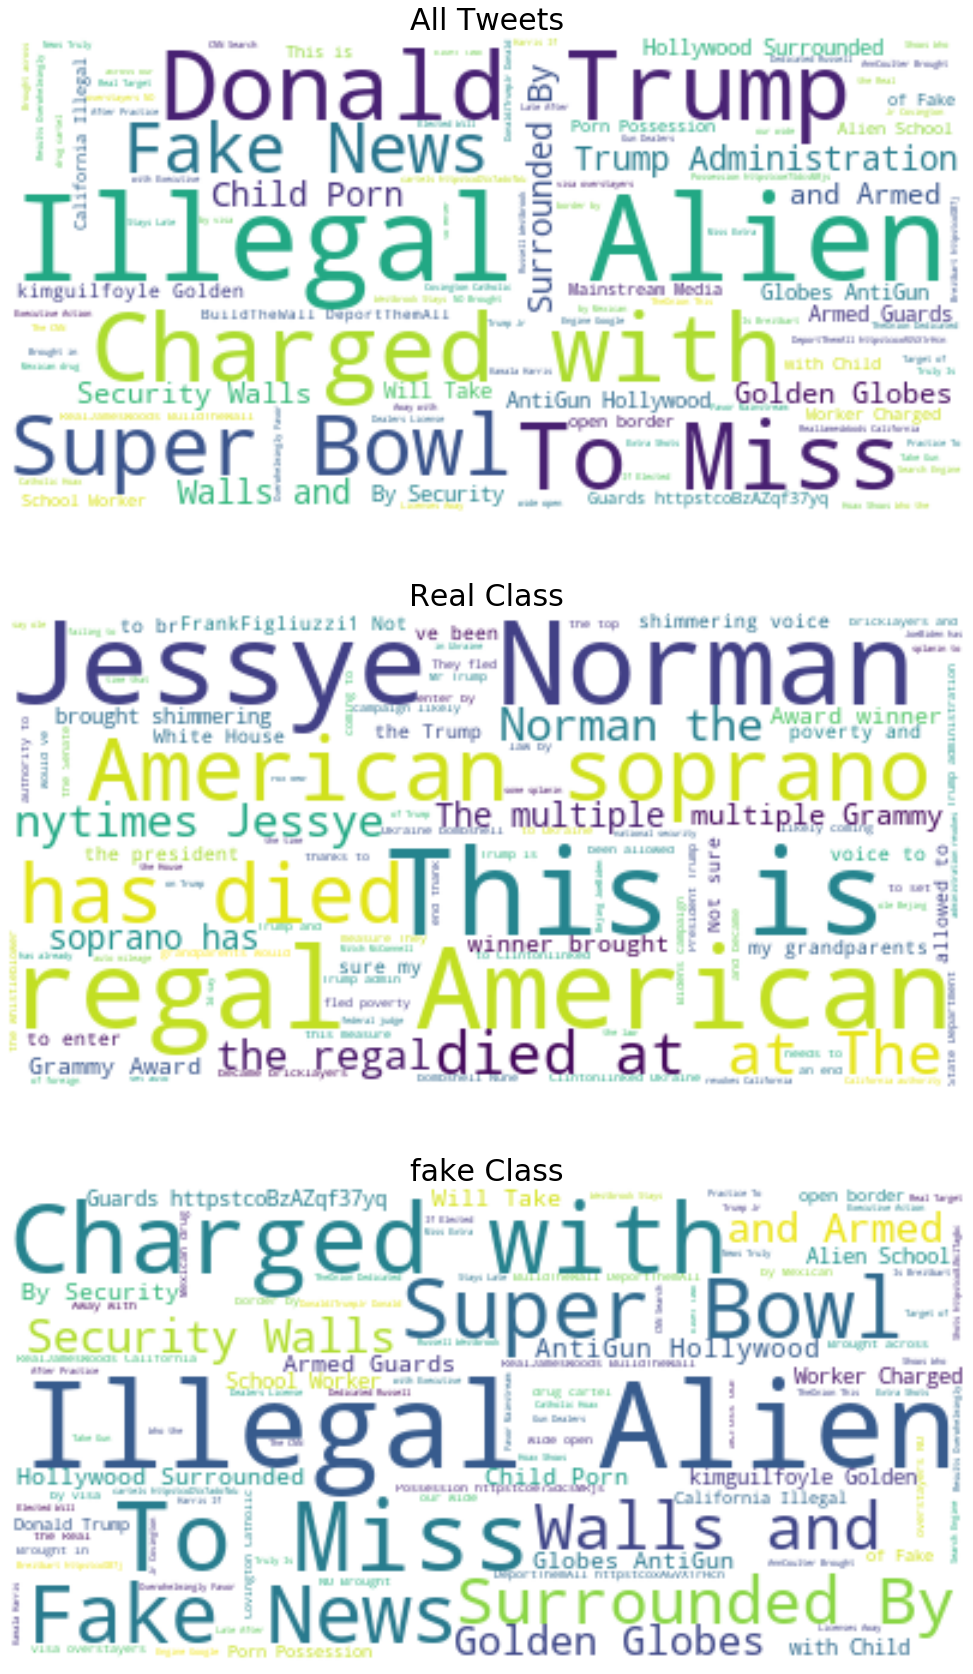

In [38]:
#Show wordcloud
#!pip install wordcloud
from wordcloud import WordCloud, STOPWORDS , ImageColorGenerator

df_real = track_reviews[track_reviews['label']==1]
df_fake = track_reviews[track_reviews['label']==0]


tweet_All = " ".join(review for review in track_reviews.text)
tweet_real = " ".join(review for review in df_real.text)
tweet_fake = " ".join(review for review in df_fake.text)

fig, ax = plt.subplots(3, 1, figsize  = (30,30))
wordcloud_ALL = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(tweet_All)
wordcloud_real = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(tweet_real)
wordcloud_fake = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(tweet_fake)

ax[0].imshow(wordcloud_ALL, interpolation='bilinear')
ax[0].set_title('All Tweets', fontsize=30)
ax[0].axis('off')
ax[1].imshow(wordcloud_real, interpolation='bilinear')
ax[1].set_title('Real Class',fontsize=30)
ax[1].axis('off')
ax[2].imshow(wordcloud_fake, interpolation='bilinear')
ax[2].set_title('fake Class',fontsize=30)
ax[2].axis('off')

#wordcloud.to_file("img/first_review.png")

In [39]:
reviews = []
sentences = list(track_reviews['text'])
for sen in sentences:
    reviews.append(preprocess_text(sen))

In [40]:
print(track_reviews.columns.values)


['text' 'label']


In [41]:
track_reviews.label.unique()


array([1, 0], dtype=int64)

In [42]:
y = track_reviews['label']


In [43]:
print(reviews[10])
print(y[10])


theonion abc camera immediately cuts away after showing harvey weinstein sitting at oscars httpstcob cpody xo oscars httpstc 
0


In [44]:
from official.modeling import tf_utils
from official import nlp
from official.nlp import bert
import official.nlp.bert.tokenization

# tensorflow
I used tensorflow for defining and training neural networks.
It's a high-level APIs based on the Keras API standard.
I spend a lot of time to figure out how use it and how can I add the moduls for the machine with pip install --
reference:https://www.tensorflow.org/overview

In [16]:
!pip install bert-for-tf2
!pip install sentencepiece
try:
    %tensorflow_version 2.x
except Exception:
    pass
import tensorflow as tf

import tensorflow_hub as hub

from tensorflow.keras import layers
import bert

  Created wheel for bert-for-tf2: filename=bert_for_tf2-0.14.9-py3-none-any.whl size=30536 sha256=799408eedc827a9a1957422120b57c4e84f9265dde1ec2d94dcc5a4f94422988
  Stored in directory: c:\users\hoda\appdata\local\pip\cache\wheels\47\b6\e5\8c76ec779f54bc5c2f1b57d2200bb9c77616da83873e8acb53
  Created wheel for params-flow: filename=params_flow-0.8.2-py3-none-any.whl size=19471 sha256=44becaa774e573e1b5e21c1164ef0c06dcc6e01c95331760fe073a4d3cbef170
  Stored in directory: c:\users\hoda\appdata\local\pip\cache\wheels\0e\fc\d2\a44fff33af0f233d7def6e7de413006d57c10e10ad736fe8f5
  Created wheel for py-params: filename=py_params-0.10.1-py3-none-any.whl size=7846 sha256=3662ee8994eeae88e788353d2bf02fecc0004d21670f2882277227de0e4813e4
  Stored in directory: c:\users\hoda\appdata\local\pip\cache\wheels\00\a7\e6\1bb77a0d3a313fa82179a79571f70adc75aecf11a10548ff21
Successfully built bert-for-tf2 params-flow py-params


# Tokenization

As a part of feature engineering I choos tokenizaition and in the process of tokenization, some characters like punctuation marks discarded. The tokens become the input for another process of text mining.
I used text extraction with BERT.
two vectors S and T with dimensions equal to that of hidden states in BERT.
the chalange was conflict with hub!
reference:https://keras.io/examples/nlp/text_extraction_with_bert

In [45]:
from bert import tokenization
from bert import bert_tokenization

BertTokenizer = bert_tokenization.FullTokenizer
bert_layer = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/2")#,trainable=False)
vocabulary_file = bert_layer.resolved_object.vocab_file.asset_path.numpy()
to_lower_case = bert_layer.resolved_object.do_lower_case.numpy()
tokenizer = BertTokenizer(vocabulary_file, to_lower_case)

In [46]:
def tokenize_reviews(text_reviews):
    return tokenizer.convert_tokens_to_ids(tokenizer.tokenize(text_reviews))

In [47]:
tokenized_reviews = [tokenize_reviews(review) for review in reviews]

# Prerparing Data For Training

I try preparing data for training in order to evaluate modle. 
For splitting the data into training and test sets to simulate how the final model will be used.

In [48]:
reviews_with_len = [[review, y[i], len(review)]
                 for i, review in enumerate(tokenized_reviews)]

In [49]:
random.shuffle(reviews_with_len)


In [50]:
reviews_with_len.sort(key=lambda x: x[2])


In [51]:
sorted_reviews_labels = [(review_lab[0], review_lab[1]) for review_lab in reviews_with_len]

In [52]:
processed_dataset = tf.data.Dataset.from_generator(lambda: sorted_reviews_labels, output_types=(tf.int32, tf.int32))
processed_dataset

<FlatMapDataset shapes: (<unknown>, <unknown>), types: (tf.int32, tf.int32)>

In [53]:
BATCH_SIZE = 32
batched_dataset = processed_dataset.padded_batch(BATCH_SIZE, padded_shapes=((None, ), ()))

In [54]:
next(iter(batched_dataset))


(<tf.Tensor: shape=(32, 6), dtype=int32, numpy=
 array([[16770, 13535,  6977, 10047,     0,     0],
        [16770, 13535,  2953,  1050,  2094,     0],
        [16770, 13535,  2080, 15451,  1044,     0],
        [ 8038,  6342, 16770, 13535,  6977,     0],
        [16770, 13535,  7361,  1059,  1040,     0],
        [16770, 13535,  2239, 16233, 17417,     0],
        [16770, 13535,  7140, 16526, 23330,     0],
        [16770, 13535, 10448,  1050, 26208,     0],
        [ 8038,  6342, 16770, 13535,  6977,     0],
        [16780, 16770, 13535, 15094,  6154,     0],
        [ 8038,  6342, 16770, 13535,  6977,     0],
        [ 8038,  6342, 16770, 13535,  6977,     0],
        [16770, 13535,  4492,  9759, 19062, 29300],
        [16770, 13535,  5358,  2140,  2002,  2243],
        [16770, 13535, 25036, 19892,  5443,  2213],
        [16770, 13535,  4747, 13876, 12273,  1047],
        [ 9576, 16770, 13535,  4492, 19098,  4241],
        [16770, 13535,  4747,  2243,  2065, 14141],
        [16770, 

In [55]:
import math
TOTAL_BATCHES = math.ceil(len(sorted_reviews_labels) / BATCH_SIZE)
print(TOTAL_BATCHES)
TEST_BATCHES = TOTAL_BATCHES // 8
batched_dataset.shuffle(TOTAL_BATCHES)
test_data = batched_dataset.take(TEST_BATCHES)
train_data = batched_dataset.skip(TEST_BATCHES)

7044


In [56]:
list(test_data.as_numpy_iterator())

[(array([[16770, 13535,  6977, 10047,     0,     0],
         [16770, 13535,  2953,  1050,  2094,     0],
         [16770, 13535,  2080, 15451,  1044,     0],
         [ 8038,  6342, 16770, 13535,  6977,     0],
         [16770, 13535,  7361,  1059,  1040,     0],
         [16770, 13535,  2239, 16233, 17417,     0],
         [16770, 13535,  7140, 16526, 23330,     0],
         [16770, 13535, 10448,  1050, 26208,     0],
         [ 8038,  6342, 16770, 13535,  6977,     0],
         [16780, 16770, 13535, 15094,  6154,     0],
         [ 8038,  6342, 16770, 13535,  6977,     0],
         [ 8038,  6342, 16770, 13535,  6977,     0],
         [16770, 13535,  4492,  9759, 19062, 29300],
         [16770, 13535,  5358,  2140,  2002,  2243],
         [16770, 13535, 25036, 19892,  5443,  2213],
         [16770, 13535,  4747, 13876, 12273,  1047],
         [ 9576, 16770, 13535,  4492, 19098,  4241],
         [16770, 13535,  4747,  2243,  2065, 14141],
         [16770, 13535,  5358, 23564,  2860,  

# Neural Network Model

In general deep learning uses "neural networks" to analyze data using an iterative method that's more flexible and intuitive than what conventional machine learning supports.
In this model I try Neural Network to text modle. 

In [57]:
class TEXT_MODEL(tf.keras.Model):
    
    def __init__(self,
                 vocabulary_size,
                 embedding_dimensions=128,
                 cnn_filters=50,
                 dnn_units=512,
                 model_output_classes=2,
                 dropout_rate=0.1,
                 training=False,
                 name="text_model"):
        super(TEXT_MODEL, self).__init__(name=name)
        
        self.embedding = layers.Embedding(vocabulary_size,
                                          embedding_dimensions)
        self.cnn_layer1 = layers.Conv1D(filters=cnn_filters,
                                        kernel_size=2,
                                        padding="valid",
                                        activation="relu")
        self.cnn_layer2 = layers.Conv1D(filters=cnn_filters,
                                        kernel_size=3,
                                        padding="valid",
                                        activation="relu")
        self.cnn_layer3 = layers.Conv1D(filters=cnn_filters,
                                        kernel_size=4,
                                        padding="valid",
                                        activation="relu")
        self.pool = layers.GlobalMaxPool1D()
        
        self.dense_1 = layers.Dense(units=dnn_units, activation="relu")
        self.dropout = layers.Dropout(rate=dropout_rate)
        if model_output_classes == 2:
            self.last_dense = layers.Dense(units=1,
                                           activation="sigmoid")
        else:
            self.last_dense = layers.Dense(units=model_output_classes,
                                           activation="softmax")
    
    def call(self, inputs, training):
        l = self.embedding(inputs)
        l_1 = self.cnn_layer1(l) 
        l_1 = self.pool(l_1) 
        l_2 = self.cnn_layer2(l) 
        l_2 = self.pool(l_2)
        l_3 = self.cnn_layer3(l)
        l_3 = self.pool(l_3) 
        
        concatenated = tf.concat([l_1, l_2, l_3], axis=-1) # (batch_size, 3 * cnn_filters)
        concatenated = self.dense_1(concatenated)
        concatenated = self.dropout(concatenated, training)
        model_output = self.last_dense(concatenated)
        
        return model_output

In [58]:
VOCAB_LENGTH = len(tokenizer.vocab)
EMB_DIM = 200
CNN_FILTERS = 100
DNN_UNITS = 256
OUTPUT_CLASSES = 2

DROPOUT_RATE = 0.2

NB_EPOCHS = 5

In [59]:
text_model = TEXT_MODEL(vocabulary_size=VOCAB_LENGTH,
                        embedding_dimensions=EMB_DIM,
                        cnn_filters=CNN_FILTERS,
                        dnn_units=DNN_UNITS,
                        model_output_classes=OUTPUT_CLASSES,
                        dropout_rate=DROPOUT_RATE)

# Accuracy

In [60]:
if OUTPUT_CLASSES == 2:
    text_model.compile(loss="mse",
                       optimizer="adam",
                       metrics=["accuracy"])
else:
    text_model.compile(loss="sparse_categorical_crossentropy",
                       optimizer="adam",
                       metrics=["sparse_categorical_accuracy"])

History indicated as number of training iterations over the dataset, or epochs.
multiple such epochs are used, only the first epoch follows the unbiased gradient of the generalization error, but of course, the additional epochs usually provide enough benefit due to decreased
training error to offset the harm they cause by increasing the gap between training
error and test error.
reference: Goodfellow, I., Bengio, Y., & Courville, A. (2016). Deep Learning (Adaptive Computation and Machine Learning series) (Illustrated ed.). The MIT Press.

In [61]:
history = text_model.fit(train_data, epochs=NB_EPOCHS)

Epoch 1/5
6164/6164 [==============================] - 1561s 251ms/step - loss: 0.0148 - accuracy: 0.9792
Epoch 2/5
6164/6164 [==============================] - 1618s 262ms/step - loss: 0.0037 - accuracy: 0.9950
Epoch 3/5
6164/6164 [==============================] - 1583s 256ms/step - loss: 0.0018 - accuracy: 0.9979
Epoch 4/5
6164/6164 [==============================] - 1609s 260ms/step - loss: 0.0013 - accuracy: 0.9984
Epoch 5/5
6164/6164 [==============================] - 1545s 250ms/step - loss: 0.0010 - accuracy: 0.9989


Evaluating model

In [62]:
results = text_model.evaluate(test_data)

880/880 [==============================] - 45s 29ms/step - loss: 0.1140 - accuracy: 0.8775


As a point:
The test data is different from the train data, so the results will be a little different. Usually worse because the new data is stuff that the model never aw during training.

In [63]:
text_model.predict(next(iter(test_data))[0])

array([[7.8411329e-01],
       [2.9052874e-01],
       [9.6187240e-01],
       [5.5538119e-05],
       [1.3632637e-01],
       [1.4637634e-01],
       [1.0000000e+00],
       [2.3221430e-01],
       [5.5538119e-05],
       [8.2119918e-01],
       [5.5538119e-05],
       [5.5538119e-05],
       [2.3144364e-02],
       [9.3493068e-01],
       [9.9999958e-01],
       [9.8533618e-01],
       [1.8082213e-01],
       [5.8875555e-01],
       [5.0326139e-02],
       [9.8507172e-01],
       [4.3578216e-01],
       [7.7079087e-13],
       [7.2710712e-08],
       [7.1273565e-01],
       [9.1144097e-01],
       [1.1304219e-04],
       [1.6402516e-01],
       [2.9846837e-05],
       [9.3143495e-07],
       [9.9700147e-01],
       [8.7894988e-01],
       [9.9433690e-01]], dtype=float32)